In [ ]:
import os
import io
from zipfile import ZipFile
import pandas as pd
import tensorflow as tf
from PIL import Image
import numpy as np
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import *
import os
import zipfile
from google.colab import drive
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_zip = '/content/drive/MyDrive/eyes_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#백내장 무 폴더 정리
img_dir0 = '/content/eyes_train/eye_train/0'
img0 = os.listdir(img_dir0)
image0 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img0))
label0 = list(filter(lambda x : x.find('.json')!=-1,img0))
image_0 = []
image_label0 = []
for i in image0:
    img = np.array(Image.open('/content/eyes_train/eye_train/0/{}'.format(i)))
    im0 = cv2.resize(img,(224,224))
    image_0.append(im0)
    image_label0.append(0)

In [ ]:
#백내장 초기 폴더 정리
img_dir1 = '/content/eyes_train/eye_train/1'
img1 = os.listdir(img_dir1)
image1 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img1))
label1 = list(filter(lambda x : x.find('.json')!=-1,img1))
for i in image1:
    img = np.array(Image.open('/content/eyes_train/eye_train/1/{}'.format(i)))
    im1 = cv2.resize(img,(224,224))
    image_0.append(im1)
    image_label0.append(1)

In [ ]:
#백내장 비성숙 폴더 정리
img_dir2 = '/content/eyes_train/eye_train/2'
img2 = os.listdir(img_dir2)
image2 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img2))
label2 = list(filter(lambda x : x.find('.json')!=-1,img2))
for i in image2:
    img = np.array(Image.open('/content/eyes_train/eye_train/2/{}'.format(i)))
    im2 = cv2.resize(img,(224,224))
    image_0.append(im2)
    image_label0.append(2)

In [ ]:
#백내장 성숙 폴더 정리
img_dir3 = '/content/eyes_train/eye_train/3'
img3 = os.listdir(img_dir3)
image3 = list(filter(lambda x: x.find('.jpg') != -1 or x.find('.png') != -1, img3))
label3 = list(filter(lambda x : x.find('.json')!=-1,img3))
for i in image3:
    img = np.array(Image.open('/content/eyes_train/eye_train/3/{}'.format(i)))
    im3 = cv2.resize(img,(224,224))
    image_0.append(im3)
    image_label0.append(3)

In [ ]:
x = np.array(image_0)
y = np.array(image_label0)

In [ ]:
#원핫 인코딩
y = np_utils.to_categorical(y)

In [ ]:
#데이터 분할
x_train, x_val, y_train, y_val = train_test_split(x, y, shuffle =True, test_size = 0.2, random_state = 123)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.nn import silu
#EfficientNetB4불러오기
Eff = EfficientNetB4(weights = 'imagenet', input_shape = (224,224,3), include_top = False, pooling='avg')

In [ ]:
rmsprop = RMSprop(
    learning_rate=0.001,
)

In [ ]:
model = Sequential()
#분류기 직접 정리
model.add(Eff)
model.add(Dense(1024))
model.add(Activation('silu'))
model.add(Dense(4,activation = 'softmax'))
model.compile(optimizer=rmsprop, # 옵티마이저 : rmsprop
              loss = 'categorical_crossentropy', # 손실 함수 : sparse_categorical_crossentropy
              metrics = ['accuracy']) # 모니터링 할 평가지표 : 
history = model.fit(x_train, y_train, 
                      epochs = 50, 
                      batch_size = 32, 
                      validation_data = (x_val, y_val))

Epoch 1/50
688/688 [==============================] - 314s 404ms/step - loss: 0.6807 - accuracy: 0.7034 - val_loss: 0.6843 - val_accuracy: 0.7620
Epoch 2/50
688/688 [==============================] - 275s 399ms/step - loss: 0.4952 - accuracy: 0.7941 - val_loss: 0.4698 - val_accuracy: 0.8081
Epoch 3/50
688/688 [==============================] - 275s 400ms/step - loss: 0.3838 - accuracy: 0.8488 - val_loss: 0.4565 - val_accuracy: 0.8221
Epoch 4/50
688/688 [==============================] - 274s 398ms/step - loss: 0.2958 - accuracy: 0.8872 - val_loss: 0.5229 - val_accuracy: 0.7961
Epoch 5/50
688/688 [==============================] - 276s 401ms/step - loss: 0.2232 - accuracy: 0.9184 - val_loss: 0.4728 - val_accuracy: 0.8454
Epoch 6/50
688/688 [==============================] - 274s 398ms/step - loss: 0.1702 - accuracy: 0.9400 - val_loss: 0.5164 - val_accuracy: 0.8305
Epoch 7/50
688/688 [==============================] - 273s 397ms/step - loss: 0.1378 - accuracy: 0.9504 - val_loss: 0.6678 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense (Dense)               (None, 1024)              1836032   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 19,513,955
Trainable params: 19,388,748
Non-trainable params: 125,207
_________________________________________________________________


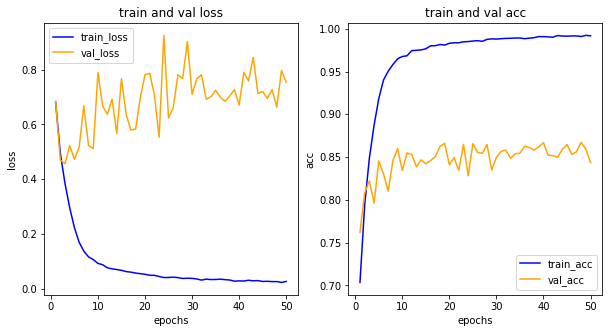

In [ ]:
# 정확도와 로스 그래프
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# 6. 모델 저장하기
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/EfficientNetB4_6000_tune0_50.h5')

In [ ]:
#정확도 f1
from sklearn.metrics import *
def get_clf_eval(y_test,pred): 
  f1 = f1_score(y_test,pred,average="macro") 
  acc = accuracy_score(y_val,predict)   
  loss = model.evaluate(x_val, y_val, batch_size=32)
  print('정확도 :',acc)
  print('f1 score:',f1)
  print('loss :',loss )

In [ ]:
predcit = model.predict(x_val)
predict = []
for i in np.arange(len(predcit)):
  labels = np.argmax(predcit[i])
  predict.append(labels)
predict = np.array(predict)
predict = np_utils.to_categorical(predict)

172/172 [==============================] - 9s 33ms/step


In [ ]:
#EfficientNetB4, Epoch50, imagenet
get_clf_eval(y_val,predict)

172/172 [==============================] - 6s 35ms/step - loss: 0.7537 - accuracy: 0.8434
정확도 : 0.8433866279069767
f1 score: 0.8426436817138492
loss : [0.753698468208313, 0.8433866500854492]


In [ ]:
Eff1 = EfficientNetB4(weights = None, input_shape = (224,224,3), include_top = False, pooling='avg')

In [ ]:
model = Sequential()
#분류기 직접 정리
model.add(Eff1)
model.add(Dense(1024))
model.add(Activation('silu')) #mish
model.add(Dense(4,activation = 'softmax'))
model.compile(optimizer=rmsprop, # 옵티마이저 : rmsprop
              loss = 'categorical_crossentropy', # 손실 함수 : sparse_categorical_crossentropy
              metrics = ['accuracy']) # 모니터링 할 평가지표 : 
history = model.fit(x_train, y_train, 
                      epochs = 50, 
                      batch_size = 32, 
                      validation_data = (x_val, y_val))

Epoch 1/50
688/688 [==============================] - 551s 750ms/step - loss: 1.0502 - accuracy: 0.4708 - val_loss: 0.8723 - val_accuracy: 0.5254
Epoch 2/50
688/688 [==============================] - 513s 746ms/step - loss: 0.8402 - accuracy: 0.5736 - val_loss: 0.8483 - val_accuracy: 0.6181
Epoch 3/50
688/688 [==============================] - 513s 746ms/step - loss: 0.7761 - accuracy: 0.6261 - val_loss: 0.7691 - val_accuracy: 0.6139
Epoch 4/50
688/688 [==============================] - 513s 745ms/step - loss: 0.7334 - accuracy: 0.6551 - val_loss: 0.8455 - val_accuracy: 0.5554
Epoch 5/50
688/688 [==============================] - 512s 745ms/step - loss: 0.6971 - accuracy: 0.6704 - val_loss: 0.7747 - val_accuracy: 0.6510
Epoch 6/50
688/688 [==============================] - 512s 745ms/step - loss: 0.6674 - accuracy: 0.6950 - val_loss: 0.6940 - val_accuracy: 0.6748
Epoch 7/50
688/688 [==============================] - 513s 745ms/step - loss: 0.6407 - accuracy: 0.7095 - val_loss: 0.6685 -

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 dense (Dense)               (None, 1024)              1836032   
                                                                 
 activation (Activation)     (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 19,513,955
Trainable params: 19,388,748
Non-trainable params: 125,207
_________________________________________________________________


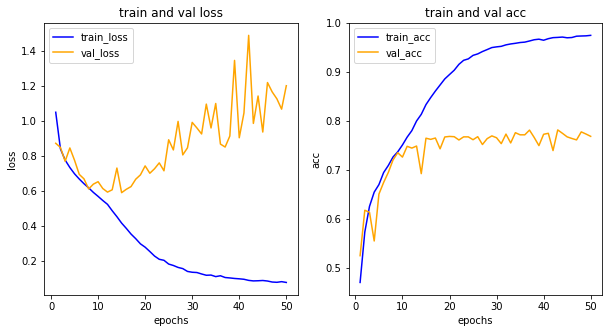

In [ ]:
# 정확도와 로스 그래프
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [ ]:
# 6. 모델 저장하기
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/EfficientNetB4_6000_tune0_None_50.h5')

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/EfficientNetB4_6000_tune0_None_50.h5')

In [ ]:
predcit = model.predict(x_val)
predict = []
for i in np.arange(len(predcit)):
  labels = np.argmax(predcit[i])
  predict.append(labels)
predict = np.array(predict)
predict = np_utils.to_categorical(predict)

172/172 [==============================] - 29s 139ms/step


In [ ]:
#EfficientNetB4, Epoch50, None
get_clf_eval(y_val,predict)

172/172 [==============================] - 28s 145ms/step - loss: 1.2023 - accuracy: 0.7689
정확도 : 0.7688953488372093
f1 score: 0.766698491595837
loss : [1.202336311340332, 0.7688953280448914]
